<a href="https://colab.research.google.com/github/WalkedKO/Circle-In-Square-problem-with-scikit-opt/blob/main/Circle_In_Square_problem_with_guofei9987_scikit_opt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
pip install scikit-opt

In [3]:
import sko
from sko.GA import RCGA
from sko.operators import crossover

# Problem

Na wejściu mamy 4 współrzędne kwadratu na kartezjańskim układzie współrzędnych.
Chcemy wygenerować koło (współrzędne środka i promień) który jest wpisany w kwadrat, tak jak na rysunku.

In [4]:
def plot_square_circle(points, circle_params, title):
  fig, ax = plt.subplots()

  plt.plot(points[0], points[1], color='blue')
  plt.plot(points[1], points[2], color='blue')
  plt.plot(points[2], points[3], color='blue')
  plt.plot(points[3], points[0], color='blue')

  circle_x, circle_y, circle_radius = circle_params
  circle_patch = plt.Circle((circle_x, circle_y), radius=circle_radius, edgecolor='red', facecolor='none')
  ax.add_patch(circle_patch)
  fig.set_figwidth(5)
  fig.set_figheight(5)
  plt.title(title)
  plt.show() # Call plt.show() only once

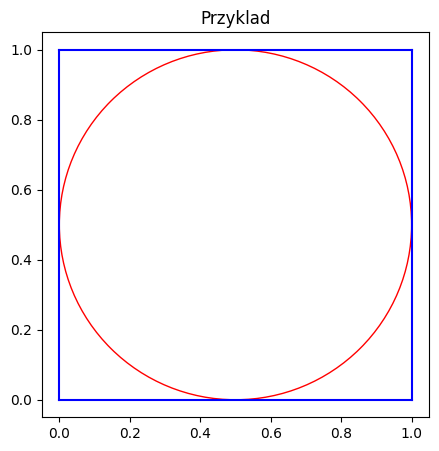

In [5]:
plot_square_circle([[0,0], [0,1], [1,1], [1,0]], (0.5, 0.5, 0.5), "Przyklad")

# Rozwiązanie za pomocą obliczeń ewolucyjnych z biblioteki guofei9987/scikit-opt

Zanim przejdziemy do przetestowania różnych rozwiązań, stwórzmy "fitness function" czyli funkcję do której minimum będziemy dążyć.


Jako że dla czterech punktów wejściowych (współrzędne kwadratu) chcemy znaleźć koło (współrzędne środka i promień) którego środek to środek kwadratu a promień to połowa boku. Co prawda jest to już rozwiązanie problemu, jednak przykład ten ma na celu pokazanie jak dane obliczenia ewolucyjne poradzą sobie z tym problemem.

In [6]:
def fitness_template(square, circle):
  circle_point = (circle[0], circle[1])
  radius = circle[2]
  perfect_center = np.array([(square[0][0] + square[2][0]) / 2, (square[0][1] + square[2][1]) / 2])

  perfect_radius = np.linalg.norm(np.array(square[0]) - np.array(square[1])) / 2
  center_shift = np.linalg.norm(np.array(circle_point) - perfect_center)
  radius_diff = abs(radius - perfect_radius)

  return center_shift + radius_diff

In [7]:
test_square = [[0,0], [0,1], [1,1], [1,0]]
fitness = lambda x: fitness_template(test_square, x)

## Genetic algorithm


Przetestujmy jak algorytm genetyczny poradzi sobie z tym problemem.




In [8]:
from sko.GA import GA
epsilon = 0.0001
ga = GA(func = fitness, n_dim = 3, size_pop = 50, max_iter = 1200, lb=[-10, -10, 0], ub=[10, 10, 20])
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

best_x: [0.50000001 0.50000001 0.49999997] 
 best_y: [4.11105675e-08]


Pokażmy jak ten wynik wygląda na płaszczyźnie

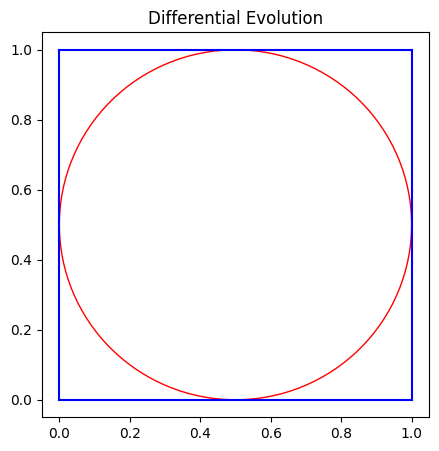

In [9]:
plot_square_circle(test_square, best_x, "Differential Evolution")

Zobaczmy po jakim czasie algorytm nauczył się odpowiedzi

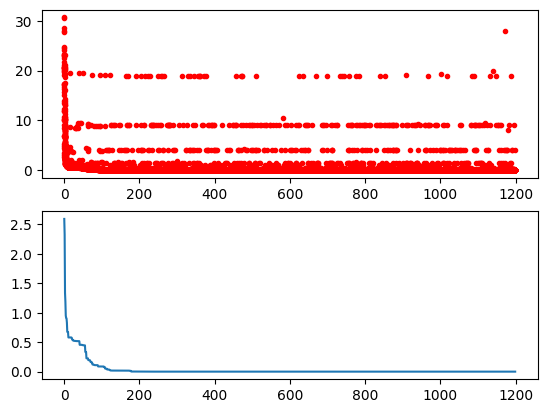

In [10]:
Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

Znajdźmy w którym pokoleniu odnaleziono wynik po raz pierwszy
(-1 znaczy że nie ma)

In [11]:
def first_correct(Y_history, epsilon):
  minimums = Y_history.min(axis=1).cummin()
  ls = minimums.loc[minimums <= epsilon]
  if ls.empty:
    return -1
  else:
    return int(ls.index[0])

In [12]:
first_correct(Y_history, epsilon)

232

Sprawdźmy jak szybko algorytm znajdzie rozwiązanie dla różnych populacji

In [13]:
def plots(algorithm, epsilon, min_pop, max_pop):
  results = []
  for i in range(min_pop, max_pop):
    pop = i * 10
    ga = algorithm(func = fitness, n_dim = 3, size_pop = pop, max_iter = 400, lb=[-10, -10, 0], ub=[10, 10, 20], precision=[0.00001, 0.00001, 0.00001])
    ga.run()
    Y_history = pd.DataFrame(ga.all_history_Y)
    fig, ax = plt.subplots(2, 1)
    ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
    Y_history.min(axis=1).cummin().plot(kind='line')
    first_occur = first_correct(Y_history, epsilon)
    print(f"Znaleziono w {first_occur} pokoleniu")
    if first_occur != -1:
      plt.axvline(x = first_occur, color = 'b', label = 'pierwsze rozwiazanie')
    results.append(first_occur)
    plt.title(f"Pop: {pop}")
    plt.show()
  return results

Znaleziono w -1 pokoleniu


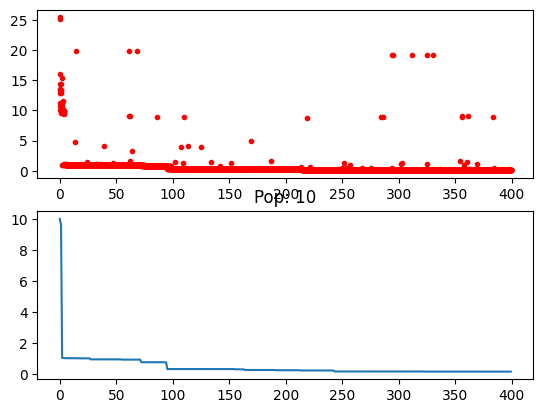

Znaleziono w -1 pokoleniu


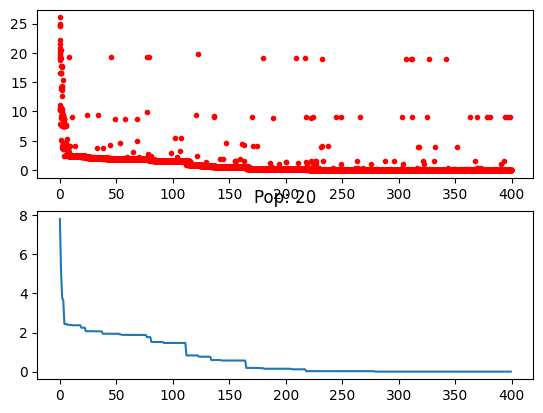

Znaleziono w 365 pokoleniu


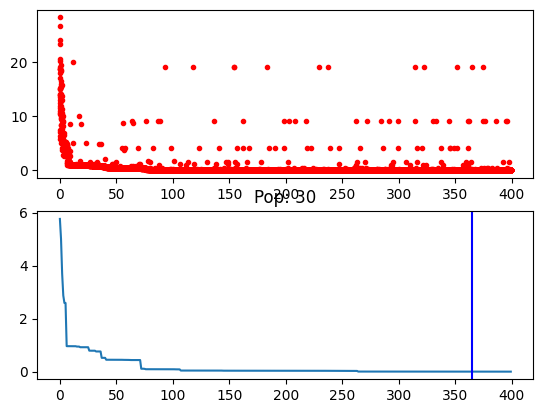

Znaleziono w 399 pokoleniu


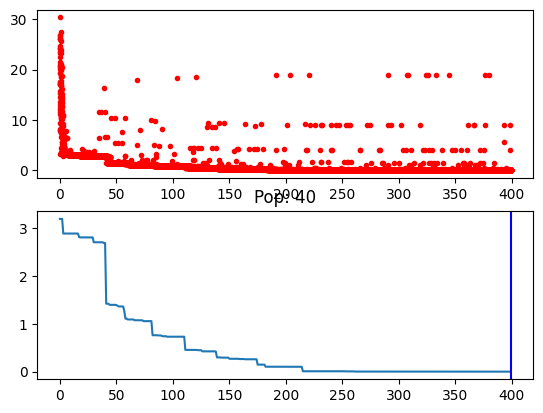

Znaleziono w 259 pokoleniu


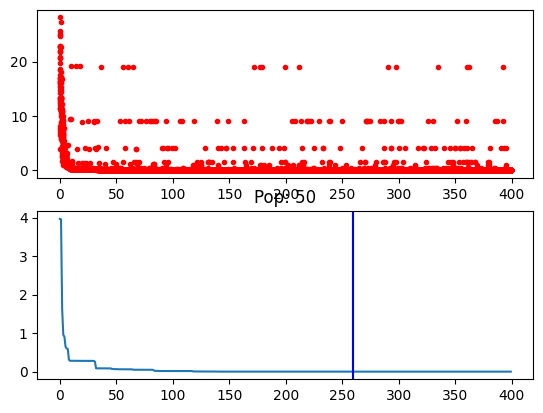

Znaleziono w 176 pokoleniu


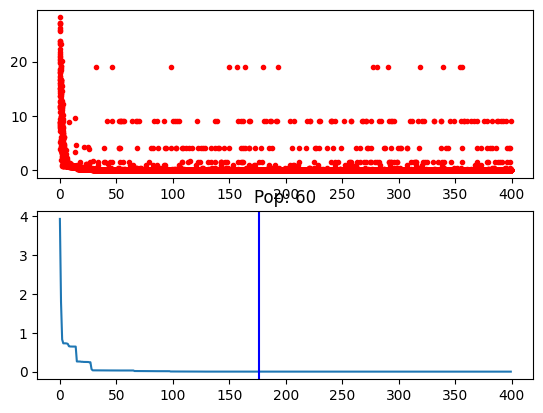

Znaleziono w 147 pokoleniu


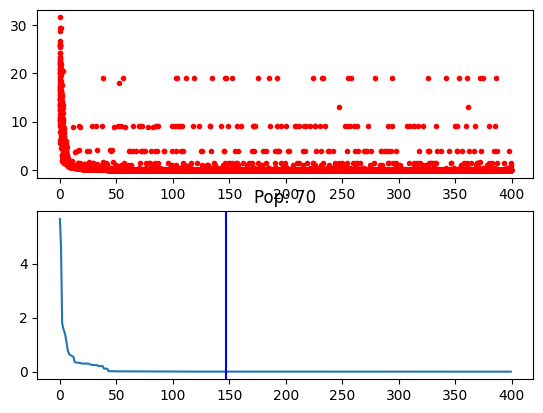

Znaleziono w 160 pokoleniu


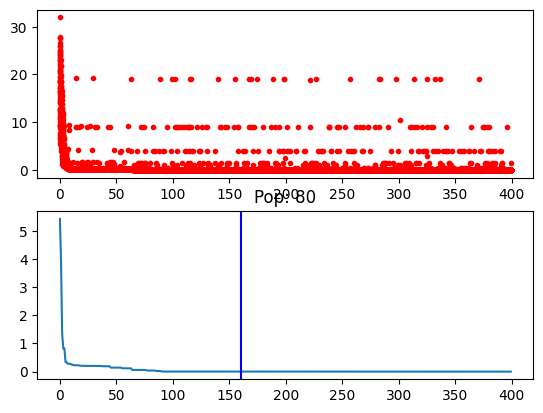

Znaleziono w 139 pokoleniu


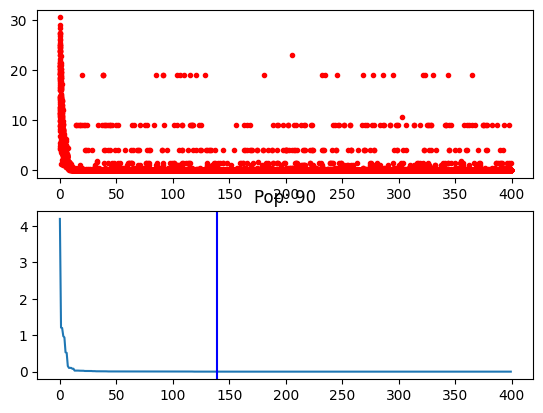

Znaleziono w 132 pokoleniu


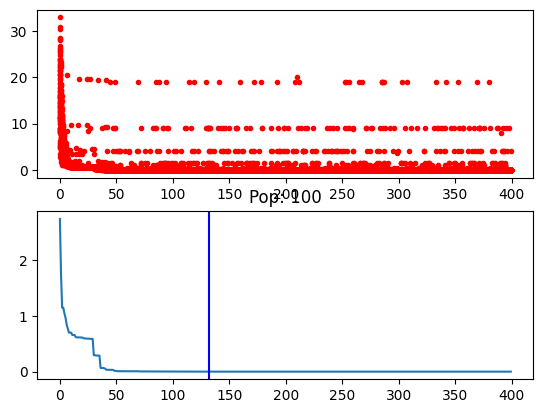

Znaleziono w 80 pokoleniu


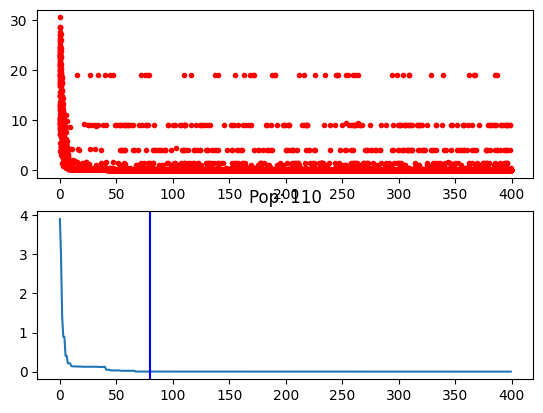

Znaleziono w 119 pokoleniu


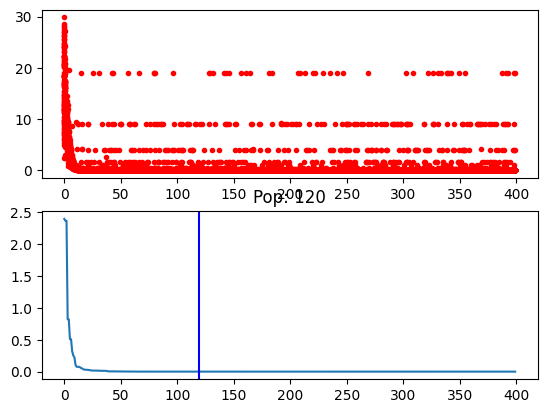

Znaleziono w 96 pokoleniu


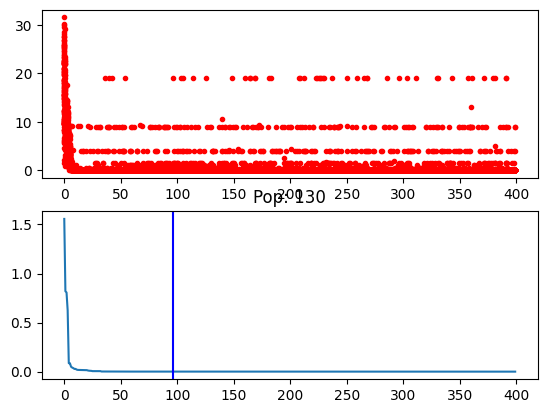

Znaleziono w 62 pokoleniu


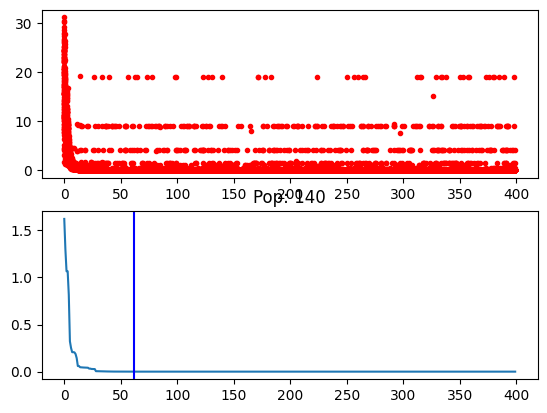

Znaleziono w 75 pokoleniu


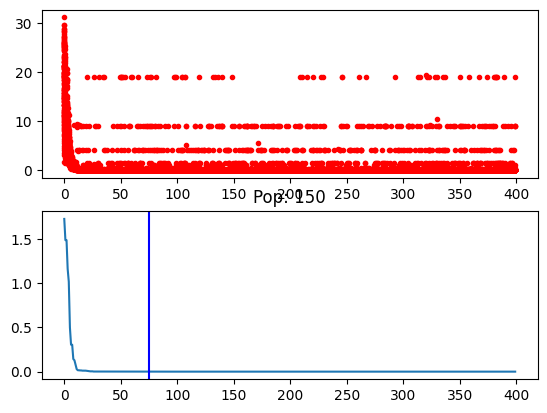

In [14]:
normal_crossover = plots(GA, epsilon, 1, 16)

Wykonajmy te same procedury dla innej metody krzyżowania np. crossover pmx (partially maxed crossover)


Znaleziono w -1 pokoleniu


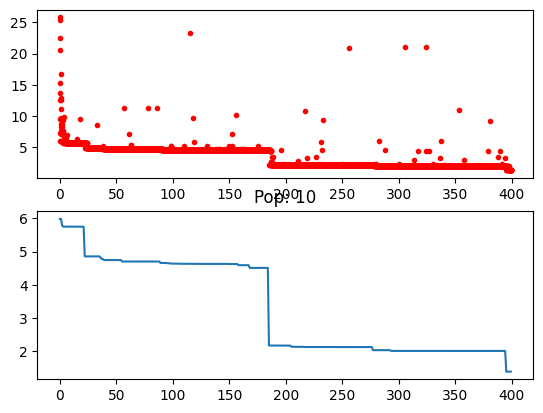

Znaleziono w 315 pokoleniu


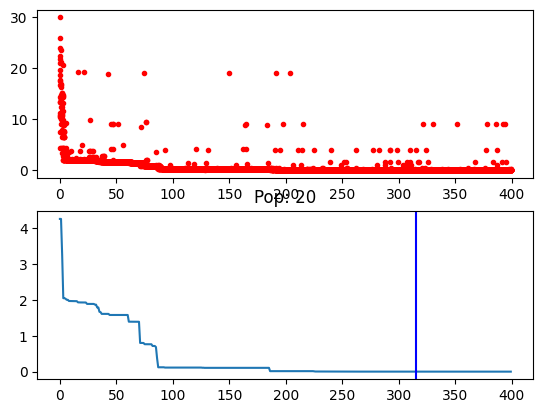

Znaleziono w 253 pokoleniu


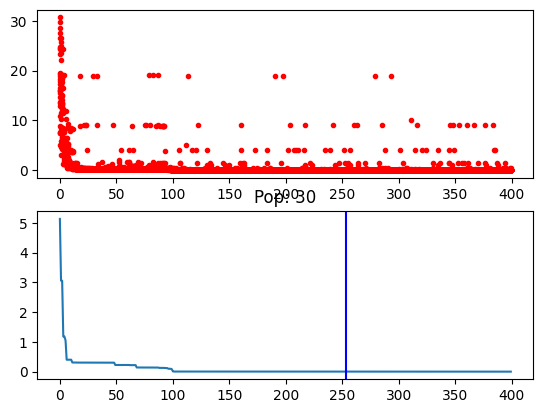

Znaleziono w 173 pokoleniu


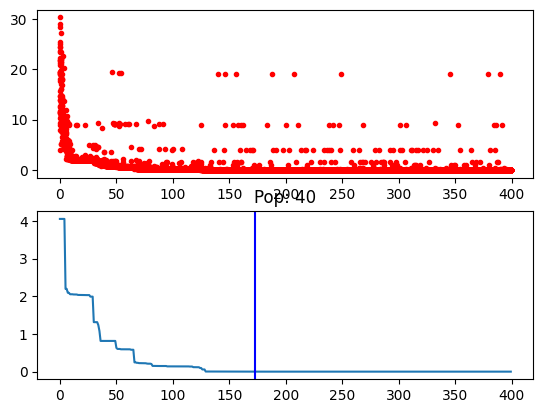

Znaleziono w 110 pokoleniu


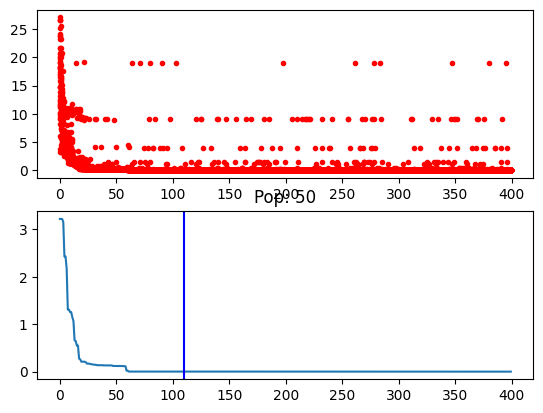

Znaleziono w 116 pokoleniu


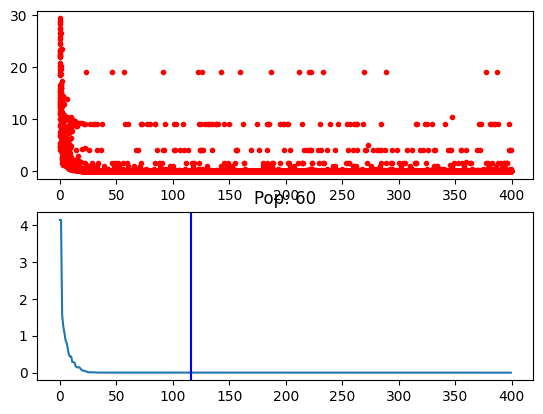

Znaleziono w 52 pokoleniu


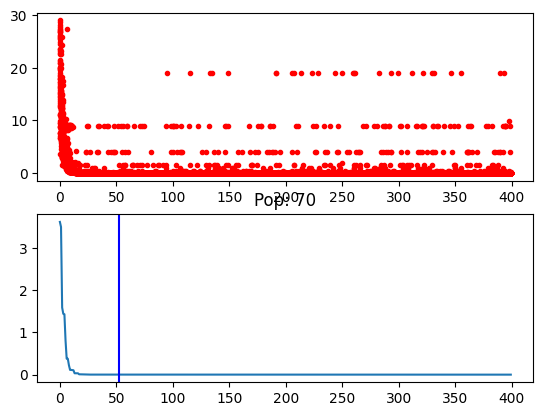

Znaleziono w 135 pokoleniu


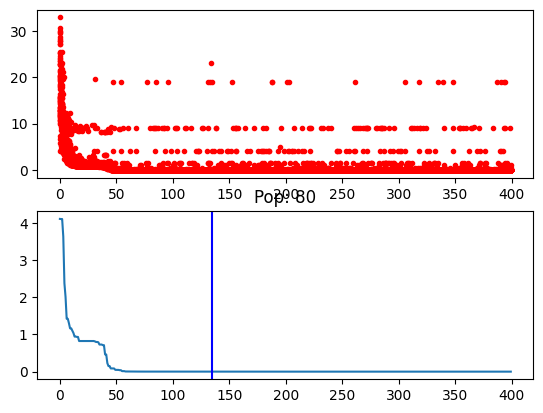

Znaleziono w 88 pokoleniu


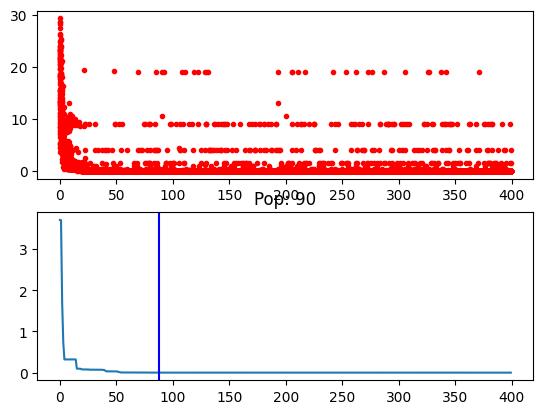

Znaleziono w 61 pokoleniu


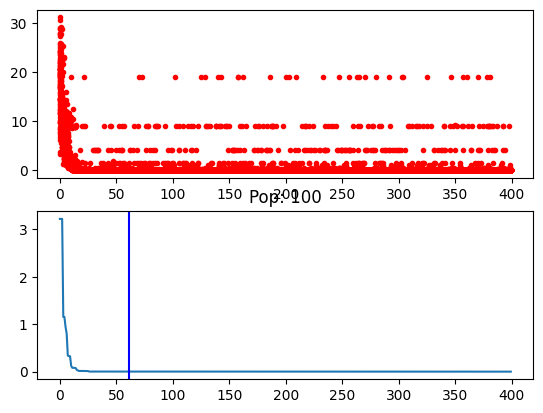

Znaleziono w 79 pokoleniu


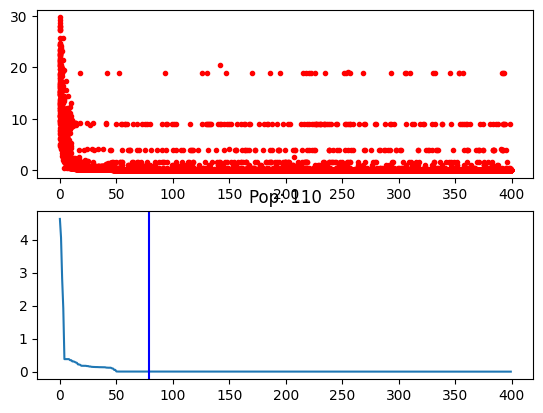

Znaleziono w 37 pokoleniu


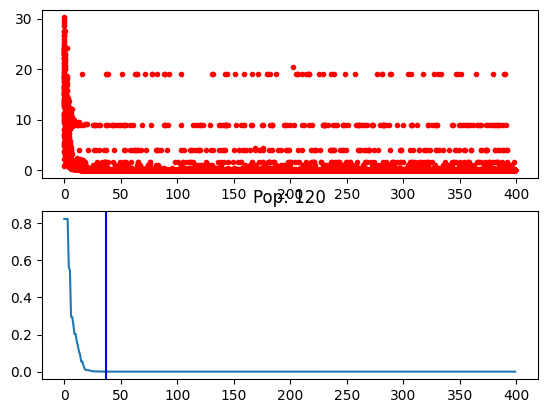

Znaleziono w 39 pokoleniu


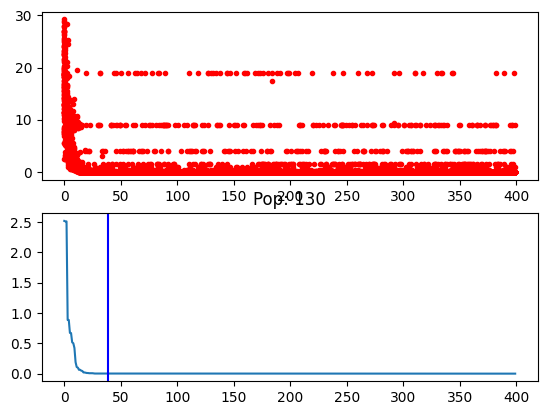

Znaleziono w 34 pokoleniu


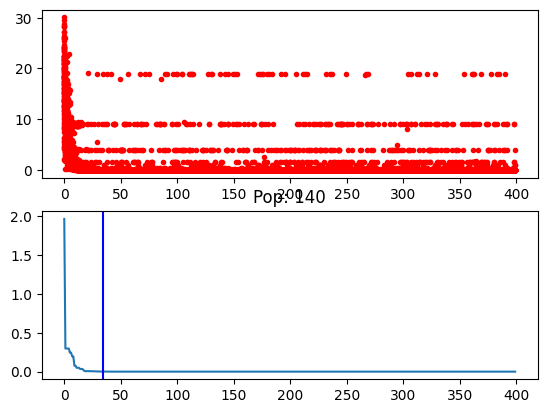

Znaleziono w 54 pokoleniu


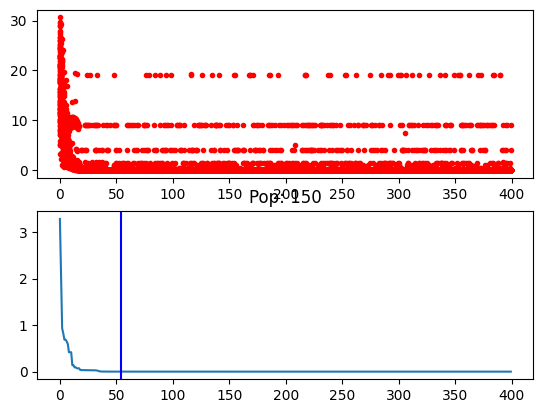

In [15]:
from sko.operators.crossover import crossover_pmx
pmx_occurs = []
class MyGA(GA):
  def crossover(self):
    return crossover_pmx(self)
pmx_occurs = plots(MyGA, epsilon, 1, 16)

Jak widać, metoda ta jest lepsza ponieważ radzi sobie szybko już dla populacji 30

Porównajmy pierwsze znalezienie rozwiązania dla obu metod


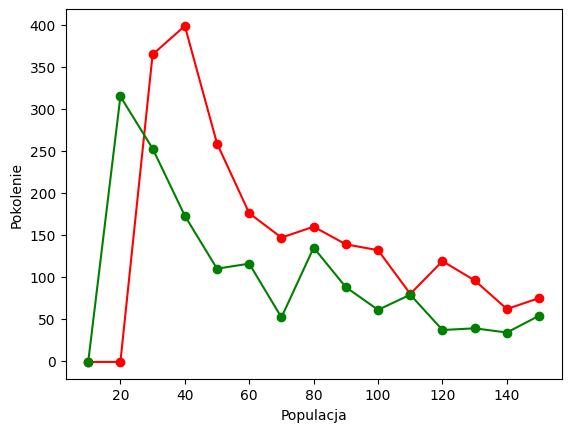

In [17]:
plt.plot([i*10 for i in range(1,16)], normal_crossover, color = 'red', label = 'normal crossover', marker='o')
plt.plot([i*10 for i in range(1,16)], pmx_occurs, color='green', label = 'pmx crossover', marker='o')
plt.ylabel('Pokolenie')
plt.xlabel('Populacja')
plt.show()

Obie metody dla większych populacji mają podobne wyniki, jednak pmx crossover sprawdza się lepiej dla małych populacji

## Porównanie innych algorytmów

Sprawdźmy jak inne algorytmy poradzą sobie z rozwiązaniem problemu


PSO

In [ ]:
from sko.PSO import PSO
pso_result = []
for cpop in range(1,100):
    ga = PSO(func = fitness, pop = cpop, n_dim = 3, max_iter = 400, lb=[-10, -10, 0], ub=[10, 10, 20])
    ga.run()
    Y_history = pd.DataFrame(ga.gbest_y_hist)
    first_occur = first_correct(Y_history, epsilon)
    if first_occur != -1:
      plt.axvline(x = first_occur, color = 'b', label = 'pierwsze rozwiazanie')
    pso_result.append(first_occur)

Differential Evolution

In [ ]:
from sko.DE import DE
de_result = []
for i in range(1, 16):
    cpop = i * 10
    de = DE(func = fitness, size_pop = cpop, n_dim = 3, max_iter = 400, lb=[-10, -10, 0], ub=[10, 10, 20])
    de.run()
    Y_history = pd.DataFrame(de.all_history_Y)
    first_occur = first_correct(Y_history, epsilon)
    if first_occur != -1:
      plt.axvline(x = first_occur, color = 'b', label = 'pierwsze rozwiazanie')
    print(cpop)
    de_result.append(first_occur)

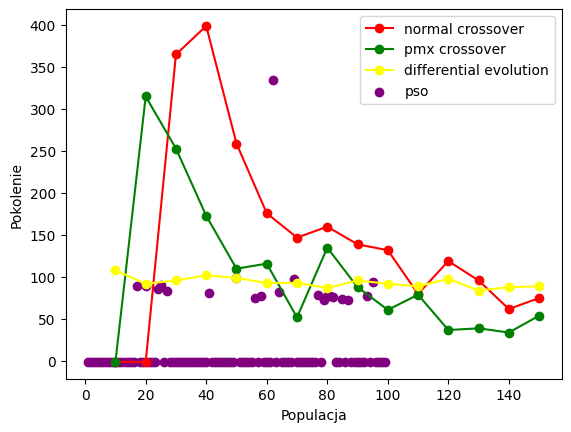

In [29]:
plt.plot([i*10 for i in range(1,16)], normal_crossover, color = 'red', label = 'normal crossover', marker='o')
plt.plot([i*10 for i in range(1,16)], pmx_occurs, color='green', label = 'pmx crossover', marker='o')
plt.plot([i*10 for i in range(1,16)], de_result, color='yellow', label = 'differential evolution', marker='o')
plt.scatter(range(1,100), pso_result, color = 'purple', label = 'pso')
plt.ylabel('Pokolenie')
plt.xlabel('Populacja')
plt.legend()
plt.show()

##Porównanie czasu



Porównajmy czas obu metod algorytmu genetycznego dla populacji od 10, 20 ... 150

In [33]:
import time
def time_list(algorithm, min_pop, max_pop, epsilon):
  result = []
  for i in range(min_pop, max_pop):
    pop = 10 * i
    start = time.time()
    ga = algorithm(func = fitness, n_dim = 3, size_pop = pop, max_iter = 400, lb=[-10, -10, 0], ub=[10, 10, 20], precision=[0.00001, 0.00001, 0.00001])
    ga.run()
    stop = time.time()
    result.append(stop-start)
  return result

In [31]:
times_normal = time_list(GA, 1, 16, epsilon)
times_pmx = time_list(MyGA, 1, 16, epsilon)


W PSO sprawdzamy tylko co 10 populacje bo tu nie chodzi nam o wynik a o czas

In [39]:
times_pso = []
for i in range(1, 16):
  cpop = 10 * i
  start = time.time()
  pso =PSO(func = fitness, pop = cpop, n_dim = 3, max_iter = 400, lb=[-10, -10, 0], ub=[10, 10, 20])
  pso.run()
  stop = time.time()
  times_pso.append(stop-start)

In [37]:
times_de = []
for i in range(1, 16):
  cpop = 10 * i
  start = time.time()
  de = DE(func = fitness, size_pop = cpop, n_dim = 3, max_iter = 400, lb=[-10, -10, 0], ub=[10, 10, 20])
  de.run()
  stop = time.time()
  times_de.append(stop-start)

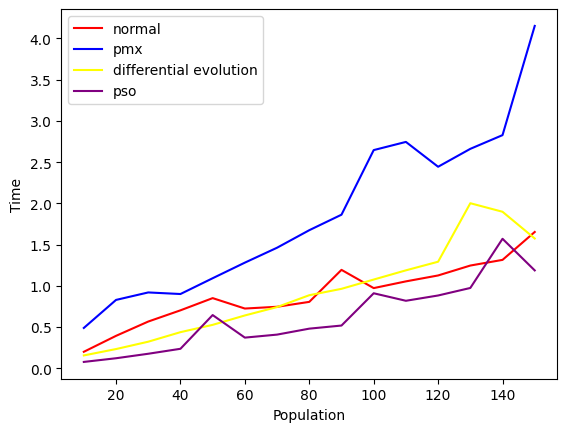

In [41]:
plt.plot([i*10 for i in range(1,16)], times_normal, color='red', label='normal')
plt.plot([i*10 for i in range(1,16)], times_pmx, color='blue', label='pmx')
plt.plot([i*10 for i in range(1,16)], times_de, color='yellow', label='differential evolution')
plt.plot([i*10 for i in range(1,16)], times_pso, color='purple', label='pso')
plt.legend()
plt.xlabel('Population')
plt.ylabel('Time')
plt.show()

Metoda domyślna (2 point bit) jest szybsza.

# Wnioski
Z zbadanych dotychczas algorytmów do znalezienia rozwiązania tego problemu, najbardziej opłaca się PSO dla niskiej populacji np (40) lub metoda krzyżowania 2 point bit, z populacją 110. Jako że wystarczająco szybko znajduje optymalne rozwiązanie a większe populacje są powolniejsze